##Coletar os dados via API Spotify

In [ ]:
!pip install spotipy

In [ ]:
#importar libs
import spotipy
import csv

In [ ]:
#conectar a API Spotify
from spotipy.oauth2 import SpotifyClientCredentials

spot = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id="xxxxxxxxx", client_secret="xxxxxxxxx"))

In [ ]:
#Função para recuperar dados do artista através do seu Nome

def get_artista_por_nome(name):
    busca = spot.search(name)
    items = busca['tracks']['items']
    if len(items) > 0:
        return items[0]['artists'][0]
    else:
        return None


In [ ]:
#A partir do artista determinado na função anterior, recuperamos o seu ID

def get_id_do_artista(artist):
    return artist['id']

In [ ]:
#Ficar atento ao limite

def get_dados_do_artista(id):
 
  #Retornar albuns do artista
  albuns_do_artista = spot.artist_albums(id, country = 'BR', limit=10)
  albuns = {}

  for i in range(len(albuns_do_artista['items'])):
    id = albuns_do_artista['items'][i]['id']
    name = albuns_do_artista['items'][i]['name']
    albuns[id] = name
 
  return albuns

In [ ]:

#Função para retornar os dados das músicas dos álbuns

def get_dados_dos_albuns(album_id, album_name):
  spotify_album = {}
  
  #Recuperar as músicas dos álbuns
  tracks = spot.album_tracks(album_id)
  
  for n in range(len(tracks['items'])):
    id_track = tracks['items'][n]['id']
    track = spot.track(id_track)
    spotify_album[id_track] = {}
    
    #As variaveis (dados) que estou buscando das músicas
    spotify_album[id_track]['album'] = album_name 
    spotify_album[id_track]['track_number'] = track['track_number'] 
    spotify_album[id_track]['name'] = track['name'] 
    spotify_album[id_track]['popularity'] = track['popularity'] 
    
  return spotify_album

In [ ]:
#Função para retornar os dados de todos os albuns

def get_dados_de_todos_albuns(albums_ids_names):
  spotify_albums = []
  albums_names = []
  for id, name in albums_ids_names.items():
    if name not in albums_names:
      albums_names.append(name)
      dados_dos_albuns = get_dados_dos_albuns(id,name) 
    for item in dados_dos_albuns.items():
      spotify_albums.append(item[1]) 
  return spotify_albums

In [ ]:
#Para poder analisar os dados coletados, precisamos criar uma Func p/ transformar todos os dados coletados em um arquivo CSV

def convert_to_csv(filepath, name):
  keys = filepath[0].keys()
  print(keys)
  csv_name = ''+ name + '.csv'
  with open(csv_name, 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(filepath)
  return

In [ ]:
#Agora o mais importante, precisamos determinar de qual artista queremos coletar os dados e fazer a coleta

name = "Pearl Jam"

artista = get_artista_por_nome(name)    

#Se encontrar o artista no spotify:
if artista:
  id_do_artista = get_id_do_artista(artista)
  dados_do_artista = get_dados_do_artista(id_do_artista)
  dados_dos_albuns = get_dados_de_todos_albuns(dados_do_artista)
  convert_to_csv(dados_dos_albuns, 'Pearl Jam')   

else:
  logger.error("Can't find artist: %s", artista)

dict_keys(['album', 'track_number', 'name', 'popularity'])


##Importar os dados e limpeza

In [ ]:
#importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Configurar o notebook
sns.set_style('whitegrid');

#Alterando estilo do matplolib
plt.style.use('ggplot')

In [ ]:
#Importando o conjunto de dados NexoAnexo
df = pd.read_excel('pj-spotify.xlsx')

In [ ]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 125
Número de entradas ou colunas 4


In [ ]:
#As colunas que pertencem ao conjunto de dados
df.columns

Index(['album', 'track_number', 'name', 'popularity'], dtype='object')

In [ ]:
#As 5 primeiras linhas do conjunto de dados
df.head()

,album,track_number,name,popularity
0,MTV Unplugged,1,Oceans - Live MTV Unplugged,55
1,MTV Unplugged,2,State of Love And Trust - Live MTV Unplugged,55
2,MTV Unplugged,3,Alive - Live MTV Unplugged,55
3,MTV Unplugged,4,Black - Live MTV Unplugged,62
4,MTV Unplugged,5,Jeremy - Live MTV Unplugged,54


In [ ]:
#Renomeando as colunas
df.columns = ['nome_do_album', 'posicao_da_faixa',  'nome_da_faixa', 'popularidade']

In [ ]:
df.tail(10)

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
115,Riot Act,6,I Am Mine,59
116,Riot Act,7,Thumbing My Way,48
117,Riot Act,8,You Are,37
118,Riot Act,9,Get Right,31
119,Riot Act,10,Green Disease,33
120,Riot Act,11,Help Help,30
121,Riot Act,12,Bu$hleaguer,31
122,Riot Act,13,1/2 Full,31
123,Riot Act,14,Arc,29
124,Riot Act,15,All or None,35


In [ ]:
#Identificando a presença de dados ausentes
df.isna().sum()

nome_do_album       0
posicao_da_faixa    0
nome_da_faixa       0
popularidade        0
dtype: int64

In [ ]:
#Verificando os tipos das colunas
df.dtypes

nome_do_album       object
posicao_da_faixa     int64
nome_da_faixa       object
popularidade         int64
dtype: object

In [ ]:
#Verificando valores duplicados
df.duplicated().value_counts()

False    125
dtype: int64

In [ ]:
df2 = df.drop_duplicates()

In [ ]:
df2.duplicated().value_counts()

False    125
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


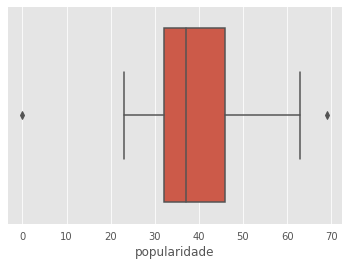

In [ ]:
#Plotando gráfico de boxplot
sns.boxplot(x=df["popularidade"], orient="vertical");

In [ ]:
#Construindo o intervalo interquartil
q1 = df.popularidade.quantile(0.25)
q3 = df.popularidade.quantile(0.75)

iqr = q3 - q1

In [ ]:
#Limite inferior [Q1−1.5×IQR]
out_low = q1 - 1.5 * iqr 
out_low

#Limite superior [Q3+1.5×IQR]
out_high = q3 + 1.5 * iqr 
out_high

print(f'''Limite ou intervalo inferior: {out_low} 
Limite ou intervalo superior: {out_high}''')

Limite ou intervalo inferior: 11.0 
Limite ou intervalo superior: 67.0


In [ ]:
#Identificando os outliers presentes
outliers = df.popularidade[(df.popularidade < out_low) | (df.popularidade > out_high)]
outliers

22     0
76    69
Name: popularidade, dtype: int64

In [ ]:
#Quem são os outliers? 
df.query("index == '0'")

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
0,MTV Unplugged,1,Oceans - Live MTV Unplugged,55


In [ ]:
#Quem são os outliers? 
df.query("index == '69'")

,nome_do_album,posicao_da_faixa,nome_da_faixa,popularidade
69,Lightning Bolt,10,Sleeping By Myself,41


##Definindo os álbuns

In [ ]:
#Albúm Live MTV Unplugged 1992
MTV_UNPLUGGED = df.query("nome_do_album == 'MTV Unplugged' ")

In [ ]:
#Albúm Riot Act 2002
RIOT_ACT = df.query("nome_do_album == 'Riot Act' ")

In [ ]:
#Albúm Pearl Jam 2006
PEARL_JAM = df.query("nome_do_album == 'Pearl Jam' ")

In [ ]:
#Albúm Gigaton 2020
GIGATON = df.query("nome_do_album == 'Gigaton' ")

In [ ]:
#Albúm Vault 9: Live in Seattle 12/8/93 
VAULT_9 = df.query("nome_do_album == 'Vault 9: Live in Seattle 12/8/93' ")

In [ ]:
#Albúm Let's Play Two 2017
LETS_PLAY = df.query("nome_do_album == 'Lets Play Two Live Original Motion Picture Soundtrack' ")

In [ ]:
#Albúm Lightning Bolt 2013
LIGHTNING_BOLT = df.query("nome_do_album == 'Lightning Bolt' ")

In [ ]:
#Albúm Backspacer 2009
BACKSPACER = df.query("nome_do_album == 'Backspacer' ")

In [ ]:
#Albúm Pearl Jam (2017 Mix) 2006
PJ_2017 = df.query("nome_do_album == 'Pearl Jam (2017 Mix)' ")

In [ ]:
#Total de músicas
print(f'Total de músicas: {df["nome_da_faixa"].count()} músicas')

Total de músicas: 125 músicas


In [ ]:
#Quantidade de músicas do albúm
print(f'O albúm tem: {GIGATON["nome_da_faixa"].count()} faixas')

O albúm tem: 12 faixas


In [ ]:
#Músicas do albúm

GIGATON[['posicao_da_faixa', 'nome_da_faixa']].reset_index(drop=True)

,posicao_da_faixa,nome_da_faixa
0,1,Who Ever Said
1,2,Superblood Wolfmoon
2,3,Dance Of The Clairvoyants
3,4,Quick Escape
4,5,Alright
5,6,Seven O'Clock
6,7,Never Destination
7,8,Take The Long Way
8,9,Buckle Up
9,10,Comes Then Goes


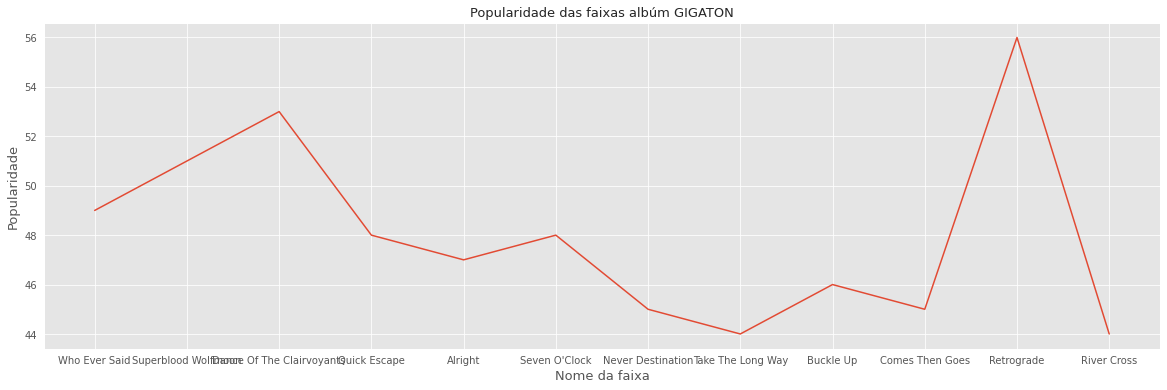

In [ ]:
#Gráfico da popularidade das músicas do albúm BACKSPACER

plt.figure(figsize=(20,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=GIGATON);
ax.set_title('Popularidade das faixas albúm GIGATON', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);

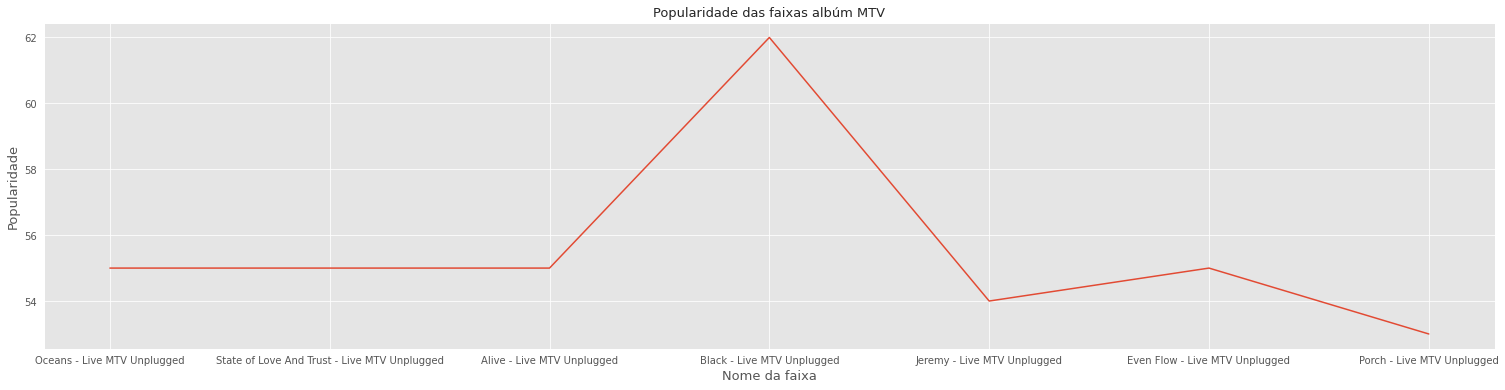

In [ ]:
#Gráfico da popularidade das músicas do albúm MTV

plt.figure(figsize=(26,6))
ax = sns.lineplot(x='nome_da_faixa', y='popularidade', data=MTV_UNPLUGGED);
ax.set_title('Popularidade das faixas albúm MTV', size=13);
ax.set_xlabel('Nome da faixa', size=13);
ax.set_ylabel('Popularidade', size=13);

##Músicas mais populares do PJ no momento

In [ ]:
#Músicas com maior popularidade no momento (Data: 05/11/20)
df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True).head(10)

,nome_da_faixa,popularidade
0,Just Breathe,69
1,Sirens,63
2,Black - Live MTV Unplugged,62
3,I Am Mine,59
4,Future Days,59
5,The Fixer,56
6,Retrograde,56
7,Come Back,56
8,State of Love And Trust - Live MTV Unplugged,55
9,Even Flow - Live MTV Unplugged,55


In [ ]:
#Retornar as 10 músicas que estão popular e transformar em uma variavel para construir o gráfico
musicas_populares = df[['nome_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)[:20]

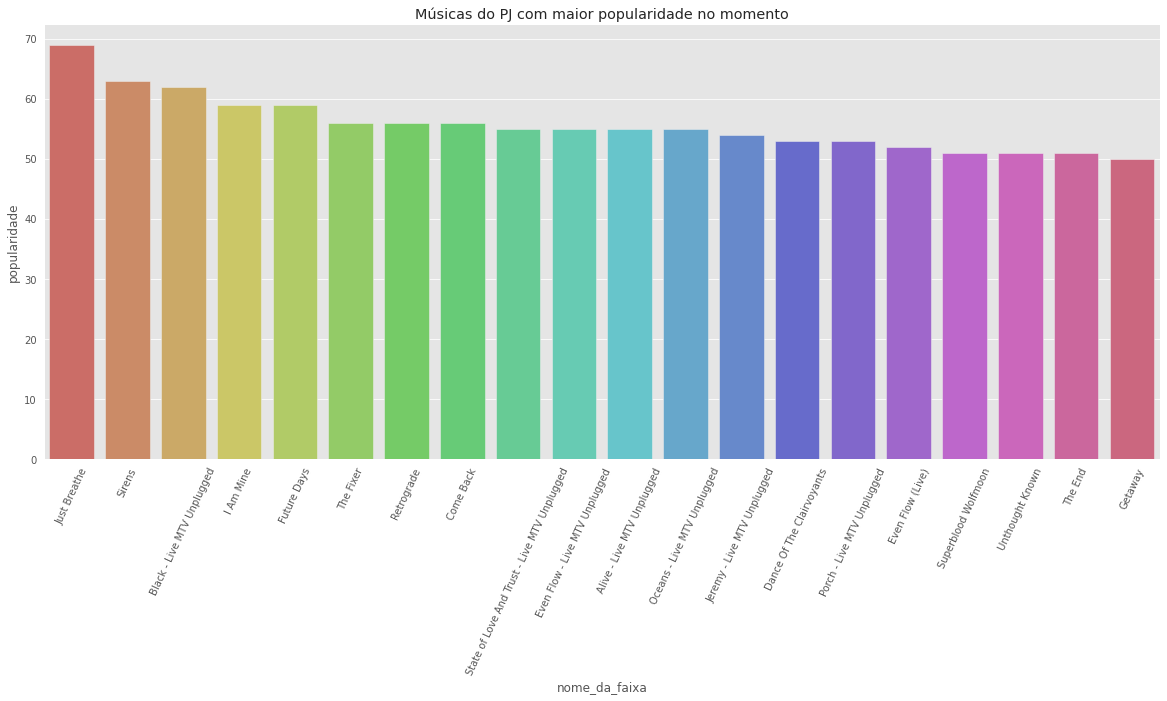

In [ ]:

#Plotar gráfico de barras com seaborn das músicas que estão popular
plt.figure(figsize=(20,8))
ax = sns.barplot(x= 'nome_da_faixa', 
                 y = 'popularidade', 
                 data = musicas_populares, 
                 palette = sns.color_palette("hls", n_colors=len(musicas_populares)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
ax.set_title('Músicas do PJ com maior popularidade no momento');

##Verificando se a popularidade das faixas tem relação com sua posição

In [ ]:
#Popularidade e posição das músicas do albúm BACKSPACER
BACKSPACER[['nome_da_faixa', 'posicao_da_faixa', 'popularidade']].sort_values(ascending=False, by='popularidade').reset_index(drop=True)

,nome_da_faixa,posicao_da_faixa,popularidade
0,Just Breathe,5,69
1,The Fixer,3,56
2,Unthought Known,7,51
3,The End,11,51
4,Amongst The Waves,6,49
5,Got Some,2,39
6,Force Of Nature,10,39
7,Speed Of Sound,9,38
8,Gonna See My Friend,1,37
9,Johnny Guitar,4,37


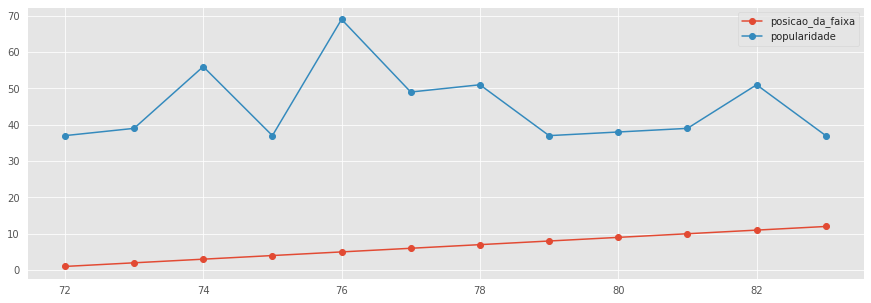

In [ ]:
#Gráfico comparativo da posição da música em relação á sua popularidade
dados = BACKSPACER[['posicao_da_faixa','popularidade']]

fig, ax = plt.subplots(figsize = (15,5))
dados.plot(kind='line', marker='o', ax=ax)
plt.show()

##Correlação (Estatística Multivariada) coeficiente de Spearman

In [ ]:
#Correlação com Spearman
df[['posicao_da_faixa', 'popularidade']].corr(method='spearman')

,posicao_da_faixa,popularidade
posicao_da_faixa,1.000000,-0.365192
popularidade,-0.365192,1.000000


In [ ]:
#Resumo estatístico com Describe
df['popularidade'].describe()

count    125.000000
mean      38.352000
std       10.479054
min        0.000000
25%       32.000000
50%       37.000000
75%       46.000000
max       69.000000
Name: popularidade, dtype: float64

In [ ]:
#Média da popularidade por álbum
media_popularidade = df.groupby('nome_do_album')['popularidade'].mean().reset_index().sort_values(ascending=False, by='popularidade')
media_popularidade

,nome_do_album,popularidade
4,MTV Unplugged,55.571429
1,Gigaton,48.000000
3,Lightning Bolt,45.250000
0,Backspacer,45.000000
5,Pearl Jam,38.307692
7,Riot Act,36.533333
2,Lets Play Two Live Original Motion Picture Sou...,36.176471
8,Vault 9: Live in Seattle 12/8/93,31.666667
6,Pearl Jam (2017 Mix),25.000000


In [ ]:
#Nova coluna de acordo com o valor da média da popularidaded
df['frequencia_de_popularidade_das_musicas'] = ['Acima da média' if x > 38 else 'Abaixo da média' for x in df['popularidade']]

In [ ]:
#Quantidade de músicas que estão acima e abaixo da média
df['frequencia_de_popularidade_das_musicas'].value_counts()

Abaixo da média    77
Acima da média     48
Name: frequencia_de_popularidade_das_musicas, dtype: int64

In [ ]:
#Músicas que estão acima da média
df.query("frequencia_de_popularidade_das_musicas == 'Acima da média' ").sort_values(ascending=False, by='popularidade').reset_index()[['nome_do_album', 'nome_da_faixa', 'popularidade', 'frequencia_de_popularidade_das_musicas']]

,nome_do_album,nome_da_faixa,popularidade,frequencia_de_popularidade_das_musicas
0,Backspacer,Just Breathe,69,Acima da média
1,Lightning Bolt,Sirens,63,Acima da média
2,MTV Unplugged,Black - Live MTV Unplugged,62,Acima da média
3,Riot Act,I Am Mine,59,Acima da média
4,Lightning Bolt,Future Days,59,Acima da média
5,Backspacer,The Fixer,56,Acima da média
6,Gigaton,Retrograde,56,Acima da média
7,Pearl Jam,Come Back,56,Acima da média
8,MTV Unplugged,State of Love And Trust - Live MTV Unplugged,55,Acima da média
9,MTV Unplugged,Oceans - Live MTV Unplugged,55,Acima da média


In [ ]:
df.query("frequencia_de_popularidade_das_musicas == 'Acima da média' & posicao_da_faixa != '1' ").sort_values(ascending=False, by='popularidade').reset_index()[['nome_da_faixa', 'posicao_da_faixa', 'frequencia_de_popularidade_das_musicas']]

,nome_da_faixa,posicao_da_faixa,frequencia_de_popularidade_das_musicas
0,Just Breathe,5,Acima da média
1,Sirens,4,Acima da média
2,Black - Live MTV Unplugged,4,Acima da média
3,I Am Mine,6,Acima da média
4,Future Days,12,Acima da média
5,Retrograde,11,Acima da média
6,Come Back,12,Acima da média
7,The Fixer,3,Acima da média
8,Alive - Live MTV Unplugged,3,Acima da média
9,State of Love And Trust - Live MTV Unplugged,2,Acima da média


In [ ]:
#Salvando o notebook em um arquivo no formato csv
df.to_csv('pj-spotify-final-3.csv')



In [ ]:
df3 = media_popularidade

In [ ]:
df3.to_csv('popularidade.csv')